In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor, bpass, wowcolor
from skimage import io, measure
import pandas as pd
from scipy.signal import savgol_filter, medfilt
import os
import corrLib
from scipy.signal import savgol_filter
import matplotlib as mpl
from numpy.polynomial.polynomial import polyvander
from scipy.optimize import curve_fit
from miscLib import label_slope
from corrLib import density_fluctuation
from scipy import signal
from scipy.interpolate import griddata
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH
import matplotlib as mpl
import pandas as pd

#### Figure 3 - intensity, orientation and velocity spatial correlation
* correlation vs. distance
* correlation length vs. concentration

Text(0, 0.5, 'correlation')

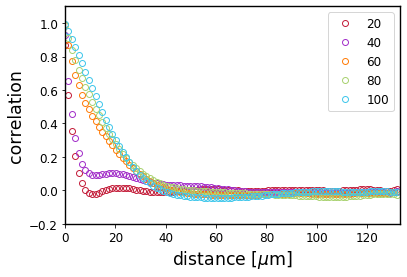

In [6]:
deg = 10 # degree of polynomial fitting
sparcity = 4 # how sparce the data lines are, larger value means less points
data = pd.read_csv(r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr\spatialCorr_crop.csv')
mpp = 0.33
count = 0
for nt in data.conc.drop_duplicates():
    subdata = data.loc[data.conc==nt]
    x = subdata.R
    y = subdata.C
    p = np.polyfit(x, y, deg)
    xfit = np.linspace(0, x.max(), int(x.max()/sparcity))
    yfit = np.dot(polyvander(xfit, deg), np.flip(p).transpose())
    plt.plot(xfit*mpp, yfit, mec=wowcolor(count), label=str(nt), ls='',
            marker='o', mfc=(0,0,0,0))
    count += 1
plt.legend()
plt.axis([0, 133, -0.2, 1.1])
plt.xlabel('distance [$\mu$m]')
plt.ylabel('correlation')

Text(0, 0.5, 'orientation correlation')

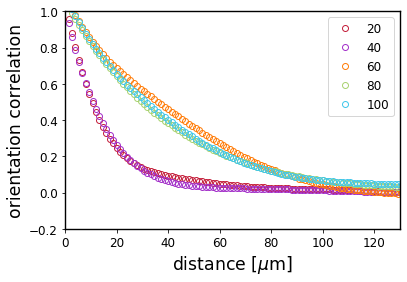

In [2]:
mpp = 0.33
sparcity = 4
deg = 15
folder = r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr'
l = dirrec(folder, 'CA*')
clA = []
count = 0
for d in l:
    dc = pd.read_csv(d)
    clA.append(corrLib.corrlength(dc, 8))
    x = np.array(dc.R)-33.35
    y = dc.C
    p = np.polyfit(x, y, deg)
    xfit = np.linspace(0, 400, int(400/sparcity))
    yfit = np.dot(polyvander(xfit, deg), np.flip(p).transpose())
    plt.plot(xfit*mpp, yfit, mec=wowcolor(count), ls='',
            marker='o', mfc=(0,0,0,0))
    count += 1
plt.legend(['20', '40', '60', '80', '100'])
plt.axis([0, 130, -0.2, 1])
plt.xlabel('distance [$\mu$m]')
plt.ylabel('orientation correlation')

Text(0, 0.5, 'velocity correlation')

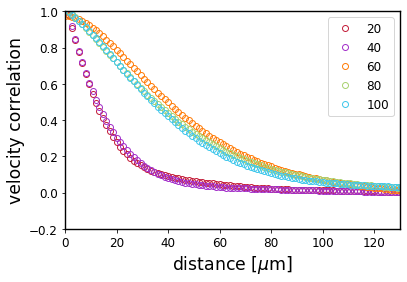

In [4]:
mpp = 0.33
folder = r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr'
l = dirrec(folder, 'CV*')
clV = []
count = 0
for d in l:
    dc = pd.read_csv(d)
    clV.append(corrLib.corrlength(dc, 8))
    x = np.array(dc.R)-33.35
    y = dc.C
    p = np.polyfit(x, y, deg)
    xfit = np.linspace(0, 400, int(400/sparcity))
    yfit = np.dot(polyvander(xfit, deg), np.flip(p).transpose())
    plt.plot(xfit*mpp, yfit, mec=wowcolor(count), ls='',
            marker='o', mfc=(0,0,0,0))
    count += 1
plt.legend(['20', '40', '60', '80', '100'])
plt.axis([0, 130, -0.2, 1])
plt.xlabel('distance [$\mu$m]')
plt.ylabel('velocity correlation')

Text(0, 0.5, 'correlation length [$\\mu$m]')

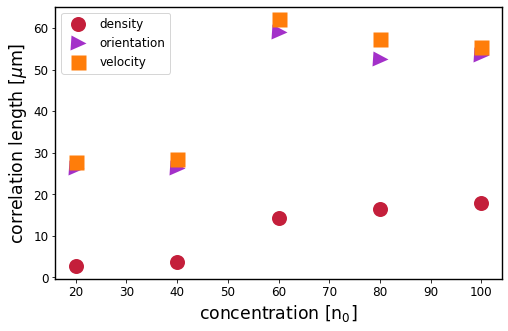

In [8]:
data = pd.read_csv(r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr\spatialCorr_crop.csv')
cl = []
for nt in data.conc.drop_duplicates():
    subdata = data.loc[data.conc==nt]
    cl.append(corrLib.corrlength(subdata, 10))
# plot correlation length
plt.figure(figsize=(8, 5))
n = [20, 40, 60, 80, 100]
plt.plot(n, np.array(cl)*mpp, ls='', marker='o', mfc=wowcolor(0), mec=(0,0,0,0),
        markersize=15, lw='2')
plt.plot(n, np.array(clA)*mpp, ls='', marker='>', mfc=wowcolor(1), mec=(0,0,0,0),
        markersize=15, lw='2')
plt.plot(n, np.array(clV)*mpp, ls='', marker='s', mfc=wowcolor(2), mec=(0,0,0,0),
        markersize=15, lw='2')
plt.legend(['density', 'orientation', 'velocity'])
plt.xlabel('concentration [n$_0$]')
plt.ylabel('correlation length [$\mu$m]')